In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/cover.csv")

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [8]:

df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

### Feature Description
**Elevation:** Elevation in meters.  
**Aspect:** Aspect in degrees azimuth.  
**Slope:** Slope in degrees.  
**Horizontal_Distance_To_Hydrology:** Horz Dist to nearest surface water features.  
**Vertical_Distance_To_Hydrology:** Vert Dist to nearest surface water features.  
**Horizontal_Distance_To_Roadways:** Horz Dist to nearest roadway.  
**Hillshade_9am:** (0 to 255 index)  Hillshade index at 9am, summer solstice.  
**Hillshade_Noon:**  (0 to 255 index) Hillshade index at noon, summer soltice.  
**Hillshade_3pm:**(0 to 255 index) Hillshade index at 3pm, summer solstice.  
**Horizontal_Distance_To_Fire_Points:** Horz Dist to nearest wildfire ignition points.  
**Wilderness_Area (4 binary columns):** (0 (absence) or 1 (presence)) Wilderness area designation.  
**Soil_Type (40 binary columns):** (0 (absence) or 1 (presence)) Soil Type designation.  
**Cover_Type (7 types):** Forest Cover Type designation.  

In [9]:
df.shape

(581012, 55)

### Remove useless column

columns where the std is 0 add no real information to the data

In [17]:
df1 = df.copy()

useless = []

for column in df1.columns:
    if df[column].std() <= 0.02:
        useless.append(column)

df1.drop(columns=useless, inplace=True)

### Quick analysis of the dataset

In [18]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [20]:
replacement = {1: 'Spruce/Fir',
                2: 'Lodgepole Pine', 
                3: 'Ponderosa Pine', 
                4: 'Cottonwood/Willow', 
                5: 'Aspen', 
                6: 'Douglas-fir',
                7: 'Krummholz'}

df1["Cover_Type"].replace(replacement, inplace=True)

In [21]:

df1 = df1.rename(columns={"Wilderness_Area1": "Rawah_WA", "Wilderness_Area2":"Neota_WA", "Wilderness_Area3": "Comanche_Peak_WA", "Wilderness_Area4": "Cache_la_Poudre_WA", "Vertical_Distance_To_Hydrology": "VD_Hydrology", "Horizontal_Distance_To_Roadways": "HD_Roadways",
"Horizontal_Distance_To_Hydrology":"HD_Hydrology",
"Horizontal_Distance_To_Fire_Points":"HD_Fire_Points"})

In [23]:
df2 = df1.copy()


,Rawah_WA,Neota_WA,Comanche_Peak_WA,Cache_la_Poudre_WA,Soil_Type1
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
581007,0,0,1,0,0
581008,0,0,1,0,0
581009,0,0,1,0,0
581010,0,0,1,0,0


In [24]:
df2 = df1.copy()
df2["Wild Areas"] =(df2.iloc[:,10:15] == 1).idxmax(1)
df2["Soil types"] =(df2.iloc[:,15:55] == 1).idxmax(1)
df2["Wild Areas"].unique()

array(['Rawah_WA', 'Comanche_Peak_WA', 'Cache_la_Poudre_WA', 'Neota_WA'],
      dtype=object)

In [28]:
df2.columns

Index(['Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hydrology',
       'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'HD_Fire_Points', 'Rawah_WA', 'Neota_WA', 'Comanche_Peak_WA',
       'Cache_la_Poudre_WA', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type', 'Wild Areas', 'Soil types'],
      dtype='object')

In [ ]:
# Columns no longer required for futher analysis purposes
df2 = df2.drop(columns=['Rawah_WA', 'Neota_WA', 'Comanche_Peak_WA', 'Cache_la_Poudre_WA','Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'])

In [32]:
df2.shape

(581012, 13)

In [33]:
df = df2

In [34]:
df.head()

,Elevation,Aspect,Slope,HD_Hydrology,VD_Hydrology,HD_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,HD_Fire_Points,Cover_Type,Wild Areas,Soil types
0,2596,51,3,258,0,510,221,232,148,6279,Aspen,Rawah_WA,Soil_Type29
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen,Rawah_WA,Soil_Type29
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine,Rawah_WA,Soil_Type12
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine,Rawah_WA,Soil_Type30
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen,Rawah_WA,Soil_Type29


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Elevation       581012 non-null  int64 
 1   Aspect          581012 non-null  int64 
 2   Slope           581012 non-null  int64 
 3   HD_Hydrology    581012 non-null  int64 
 4   VD_Hydrology    581012 non-null  int64 
 5   HD_Roadways     581012 non-null  int64 
 6   Hillshade_9am   581012 non-null  int64 
 7   Hillshade_Noon  581012 non-null  int64 
 8   Hillshade_3pm   581012 non-null  int64 
 9   HD_Fire_Points  581012 non-null  int64 
 10  Cover_Type      581012 non-null  object
 11  Wild Areas      581012 non-null  object
 12  Soil types      581012 non-null  object
dtypes: int64(10), object(3)
memory usage: 57.6+ MB


In [36]:
numeric_features = [column for column in df.columns if df[column].dtype != 'O']
categorical_features = [column for column in df.columns if df[column].dtype == 'O']

In [39]:
print(f"We have {len(numeric_features)} which are {numeric_features}")
print(f"We have {len(categorical_features)} which are: {categorical_features}")

We have 10 which are ['Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hydrology', 'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'HD_Fire_Points']
We have 3 which are: ['Cover_Type', 'Wild Areas', 'Soil types']


### Univariate Analysis

**purpose:** understanding the distribution of an individual variable

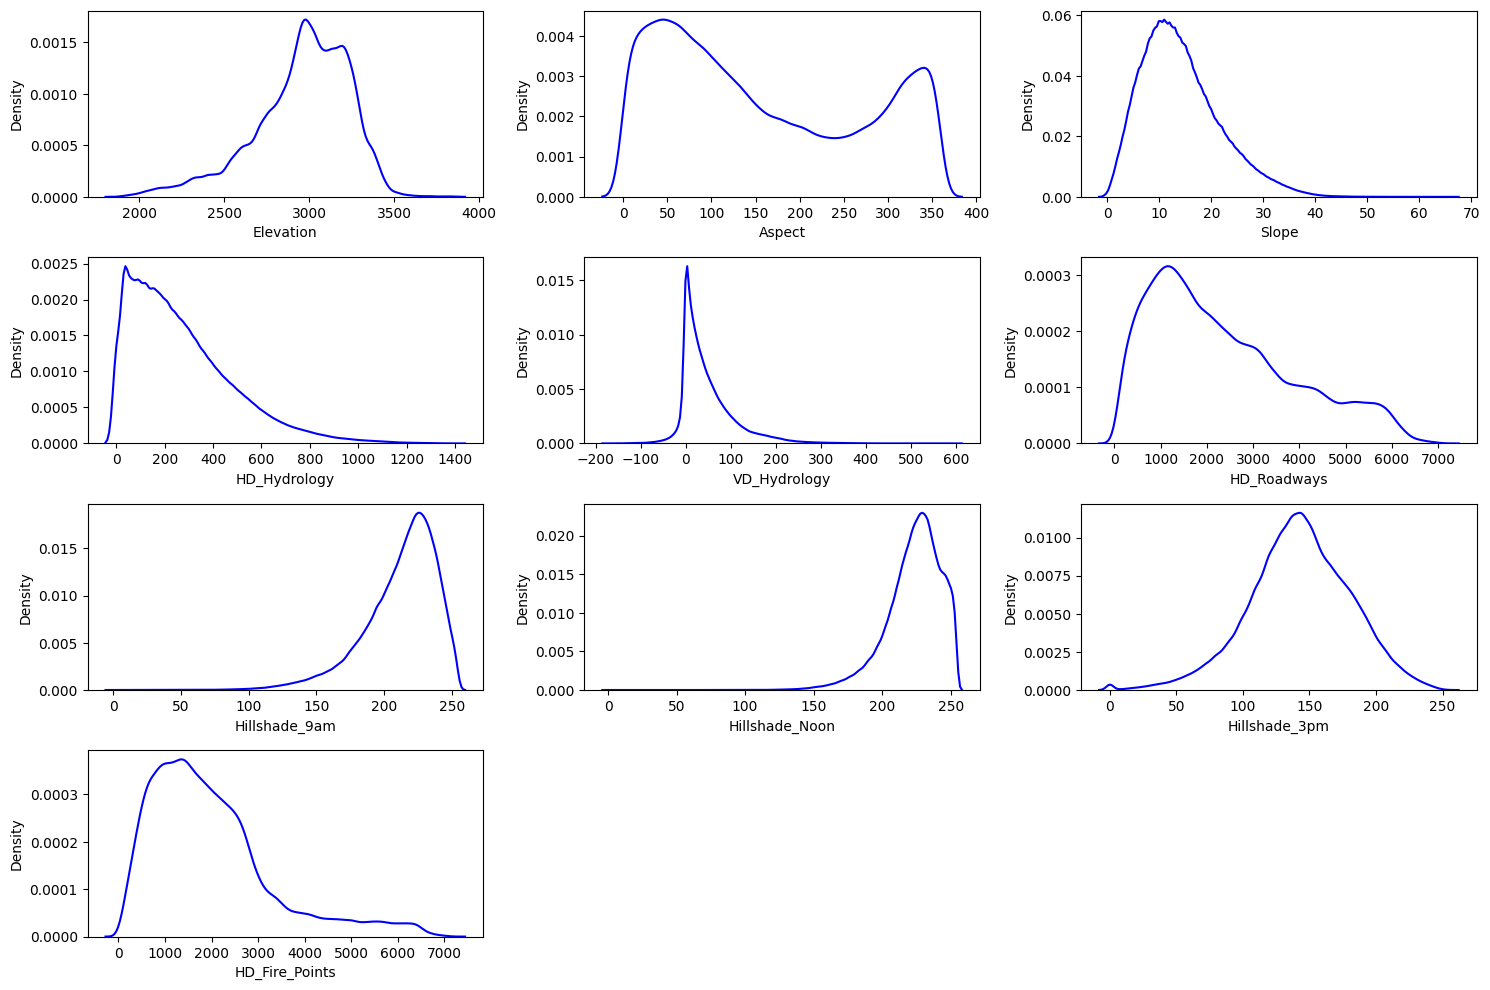

In [46]:
plt.figure(figsize=(15, 10))
plt.title("Univariate Analysis of numerical Features of the dataset", fontsize=20, fontweight="bold", y=1, alpha=0.8)

for idx, column in enumerate(numeric_features):
    plt.subplot(4, 3, idx+1)
    sns.kdeplot(x=df[column], color="blue")
    plt.xlabel(column)
    plt.tight_layout()

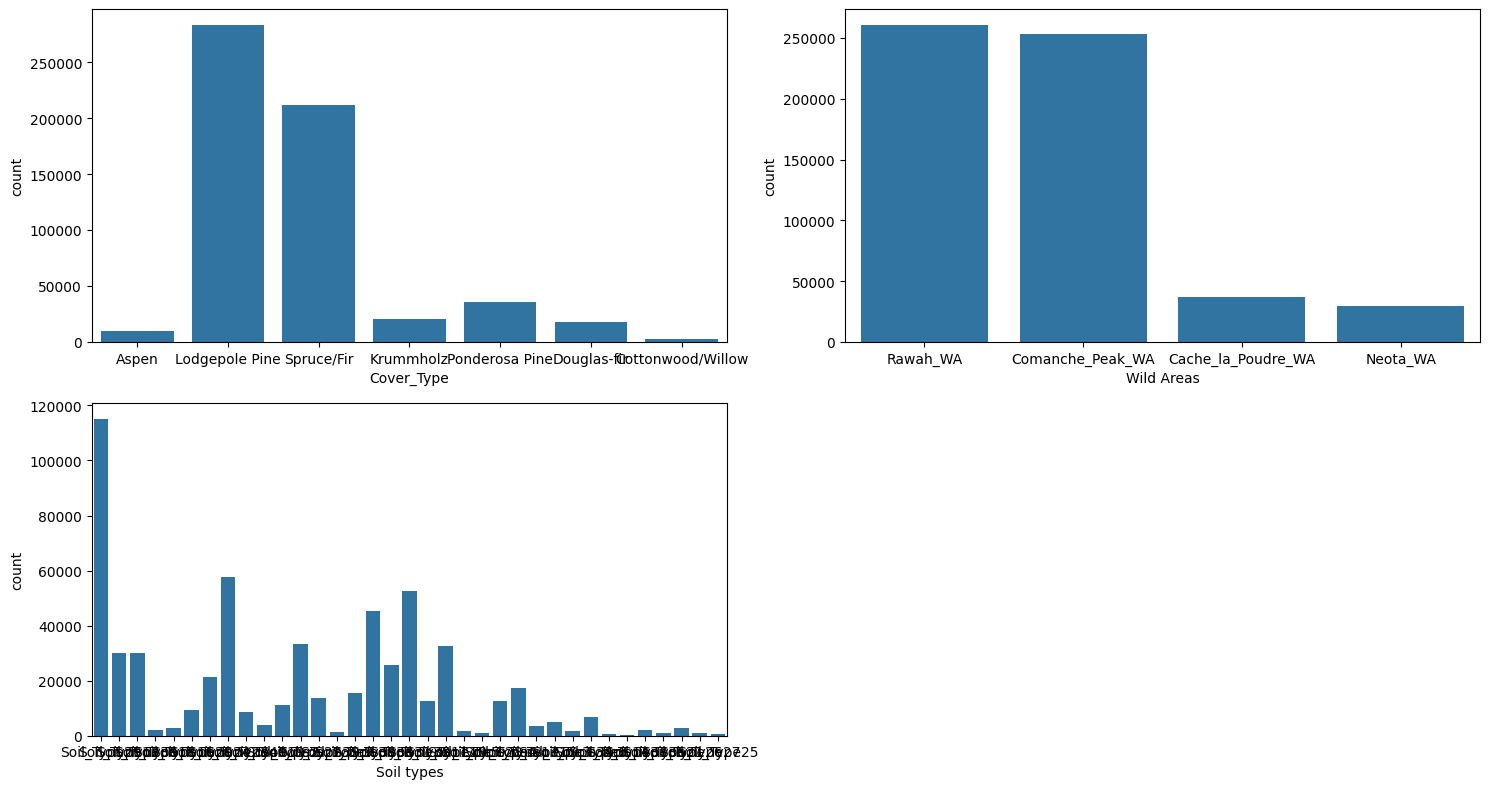

In [49]:
plt.figure(figsize=(15, 8))
plt.title("Univariate Analysis of Categorical Features", fontsize=20, fontweight="bold", y=1, alpha=0.8)

for idx, column in enumerate(categorical_features):
    plt.subplot(2, 2, idx+1)
    sns.countplot(x=df[column])
    plt.xlabel(column)
    plt.tight_layout()

### Multivariate Analysis

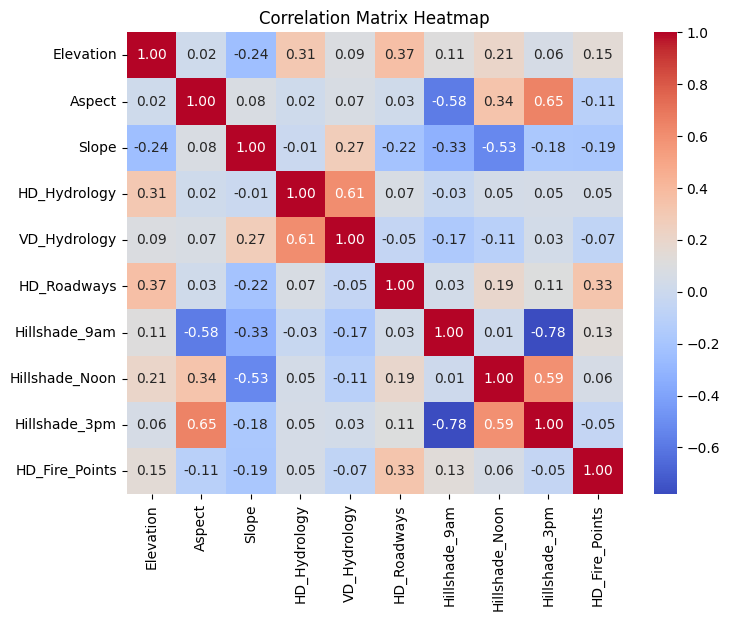

In [54]:
# Compute the correlation matrix
correlation_matrix = df[numeric_features].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()


#### Inferences (Correlated Features)
* Aspect and Hillshade at 9am
* Aspect and Hillshade at 3pm
* Slope and Hillshade at Noon
* Horizontal Distance to hydrology and Vertical Distance to Hydrology
* Hillshade at 9am and Hillshade at 3pm

### Checking Null Values

In [55]:
df.isnull().sum()

Elevation         0
Aspect            0
Slope             0
HD_Hydrology      0
VD_Hydrology      0
HD_Roadways       0
Hillshade_9am     0
Hillshade_Noon    0
Hillshade_3pm     0
HD_Fire_Points    0
Cover_Type        0
Wild Areas        0
Soil types        0
dtype: int64

### Output Distribution

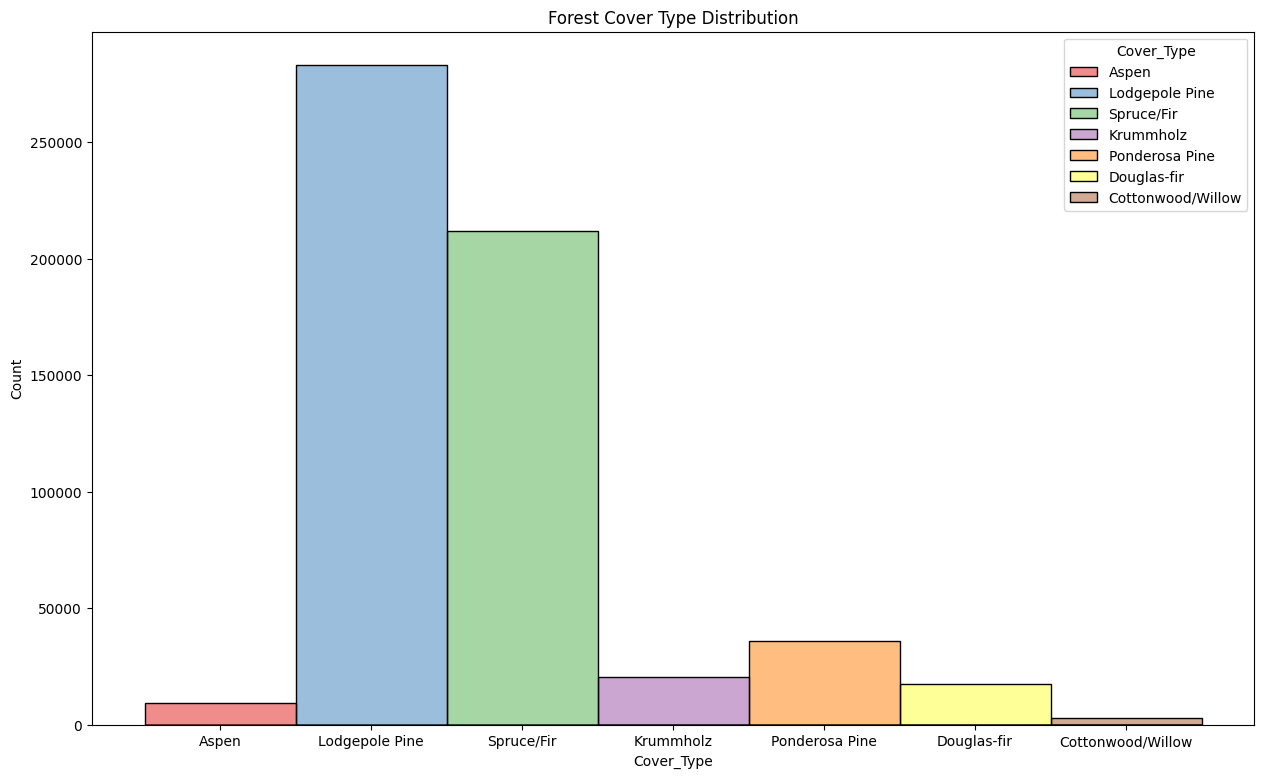

In [56]:
plt.figure(figsize=(15, 9))
sns.histplot(data=df, x="Cover_Type", hue="Cover_Type", palette="Set1")
plt.title("Forest Cover Type Distribution")
plt.show()

*Note:* Imbalance Dataset

### Distribution of Forest Cover Depending on Wild area

<Axes: xlabel='Wild Areas'>

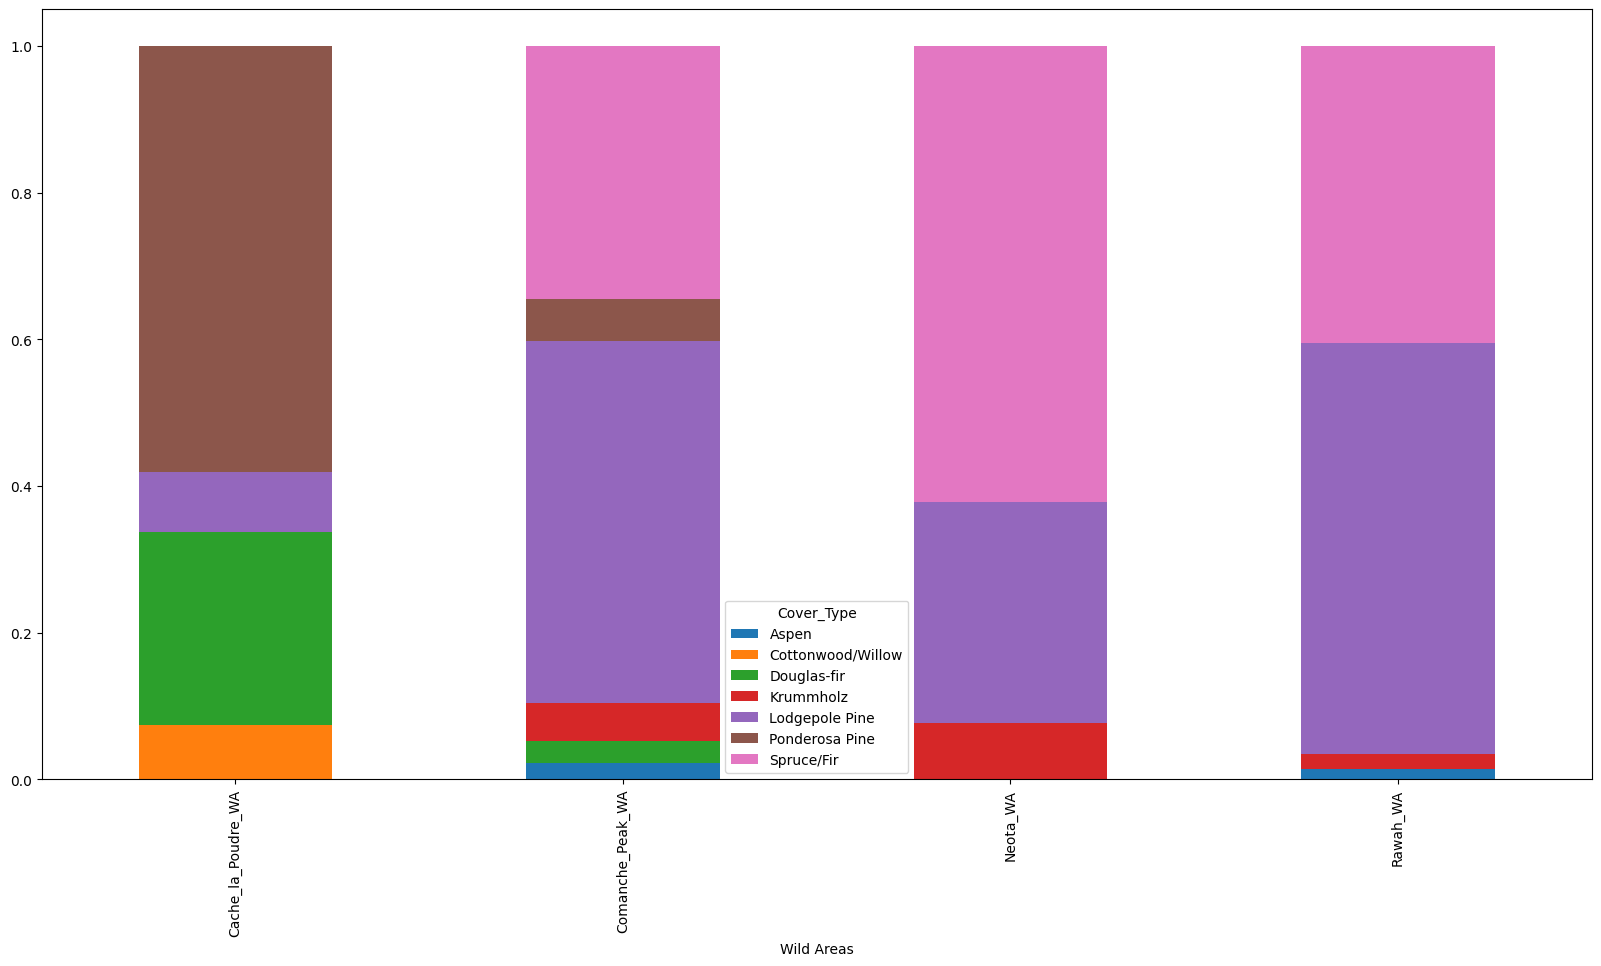

In [57]:
wild_area_cover = df.groupby(["Wild Areas"])["Cover_Type"].value_counts(normalize=True).unstack()
wild_area_cover.plot(kind="bar", stacked=True, figsize=(20,10))